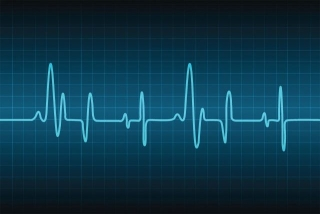

# **Project Description: ECG Normal and PVC Classification**

This project involves the classification of Electrocardiogram (ECG) signals into two categories: **Normal beats** and **Premature Ventricular Contractions (PVC)**. The analysis utilizes data from the following files:

- **Normal_Train.txt**: Training data for normal heartbeats.
- **PVC_Train.txt**: Training data for PVC heartbeats.
- **Normal_Test.txt**: Testing data for normal heartbeats.                                                    
- **PVC_Test.txt**: Testing data for PVC heartbeats.

## **Objective**
The primary objective is to develop a robust classification model that accurately distinguishes between normal heartbeats and PVCs by leveraging signal processing and machine learning techniques.


# **1) Importing Libraries**

In [334]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
import pywt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
from sklearn import metrics
from sklearn.metrics import confusion_matrix


# **2) Loading Data**

In [335]:
def load_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    data = []
    for line in lines:
        values = [value for value in line.strip().split('|') if value]
        data.append(list(map(float, values)))
    return np.array(data)

In [336]:
normal_data = load_data('Normal_Train.txt')
pvc_data = load_data('PVC_Train.txt')

In [337]:
normal_test=load_data('Normal_Test.txt')
pvc_test=load_data('PVC_Test.txt')

In [338]:
normal_data

array([[-0.050778  , -0.050778  , -0.040778  , ...,  0.014222  ,
         0.019222  ,  0.019222  ],
       [ 0.019222  ,  0.014222  ,  0.009222  , ..., -0.065778  ,
        -0.060778  , -0.060778  ],
       [-0.070778  , -0.080778  , -0.080778  , ..., -0.12578   ,
        -0.13578   , -0.12078   ],
       ...,
       [-0.085778  , -0.075778  , -0.085778  , ...,  0.009222  ,
         0.009222  , -0.00077803],
       [-0.025778  , -0.010778  ,  0.004222  , ...,  0.099222  ,
         0.079222  ,  0.064222  ],
       [ 0.084222  ,  0.034222  ,  0.044222  , ..., -0.11578   ,
        -0.10578   , -0.10578   ]])

# **3) Plotting Signals**

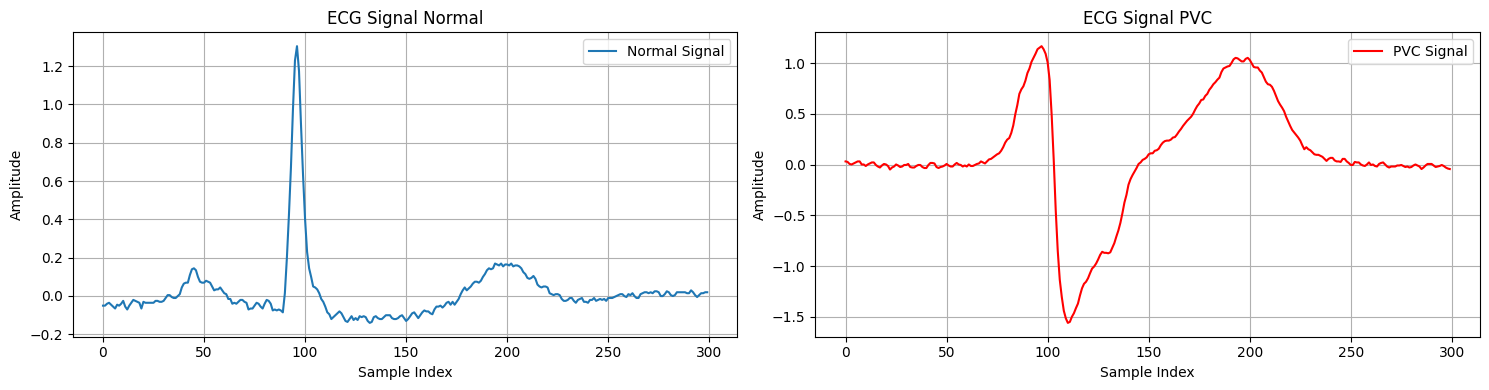

In [339]:
normal_signal = normal_data[0]
pvc_signal=pvc_data[0]

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].plot(normal_signal, label="Normal Signal")
axs[0].set_title("ECG Signal Normal")
axs[0].set_xlabel("Sample Index")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(pvc_signal, label="PVC Signal", color='red')
axs[1].set_title("ECG Signal PVC")
axs[1].set_xlabel("Sample Index")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()




# **4) Concatenating Normal and PVC**

In [340]:
data = np.concatenate([normal_data, pvc_data], axis=0)
labels = np.array([0] * normal_data.shape[0] + [1] * pvc_data.shape[0])  # 0: Normal, 1: PVC

In [341]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

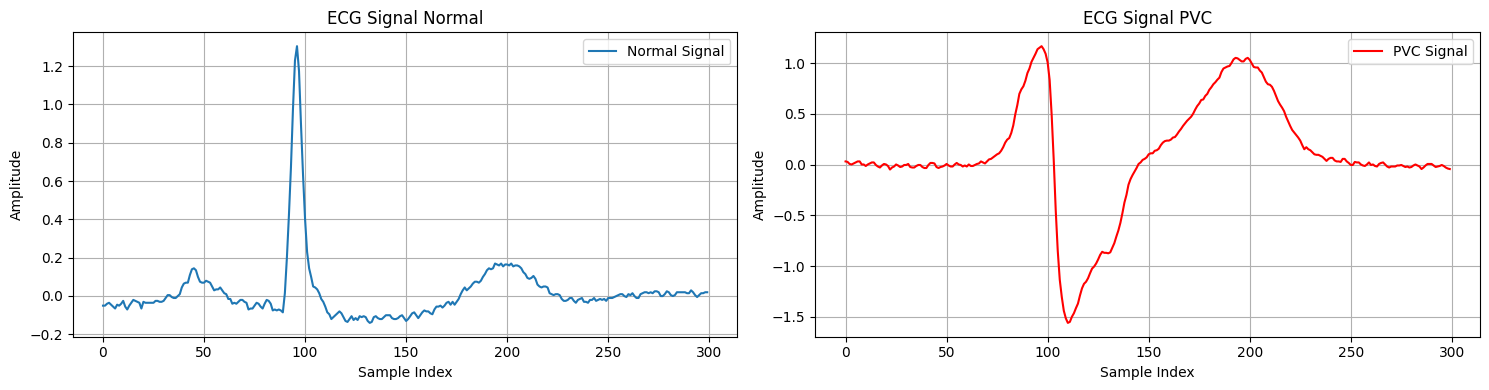

In [342]:
normal_signal = data[0]
pvc_signal=data[200]

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].plot(normal_signal, label="Normal Signal")
axs[0].set_title("ECG Signal Normal")
axs[0].set_xlabel("Sample Index")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(pvc_signal, label="PVC Signal", color='red')
axs[1].set_title("ECG Signal PVC")
axs[1].set_xlabel("Sample Index")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# **5) Signal Preprocessing**

### **I) Band Pass Filter**

In [343]:
def bandpass_filter(signal, lowcut=0.5, highcut=40, fs=360, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

In [344]:
filtered_data = np.array([bandpass_filter(sig) for sig in data])
normal_test = np.array([bandpass_filter(sig) for sig in normal_test])  
pvc_test = np.array([bandpass_filter(sig) for sig in pvc_test])

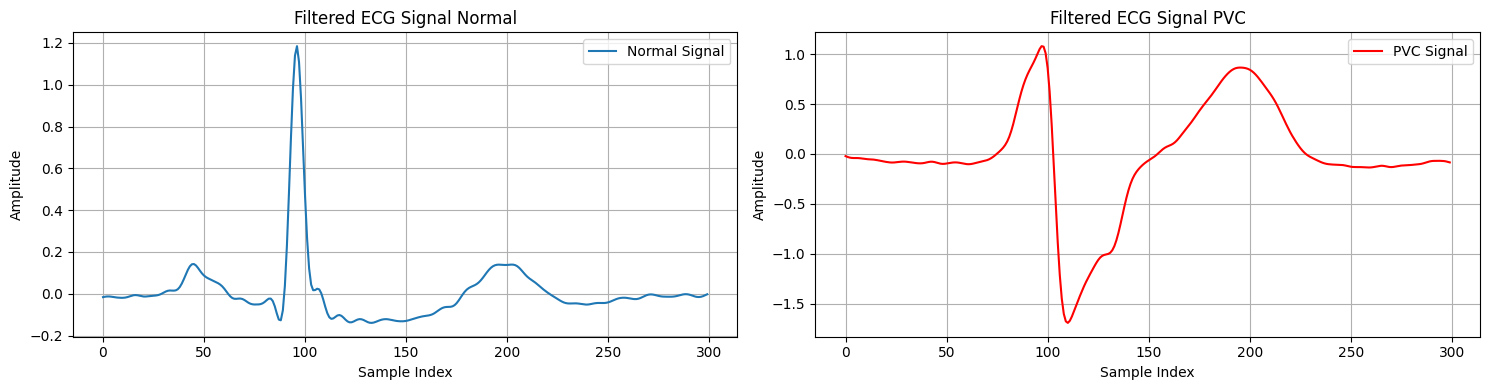

In [345]:
normal_signal = filtered_data[0]
pvc_signal=filtered_data[200]

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].plot(normal_signal, label="Normal Signal")
axs[0].set_title("Filtered ECG Signal Normal")
axs[0].set_xlabel("Sample Index")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(pvc_signal, label="PVC Signal", color='red')
axs[1].set_title("Filtered ECG Signal PVC")
axs[1].set_xlabel("Sample Index")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### **II) Normalization**

**We used min-max scaling to scale data to range [-1,1]**

In [346]:
def normalize_signal(signal):
    min_val = np.min(signal)
    max_val = np.max(signal)
    normalized_signal = 2 * (signal - min_val) / (max_val - min_val) - 1
    return normalized_signal

In [347]:
normalized_data = [normalize_signal(sig) for sig in filtered_data]
normal_test = [normalize_signal(sig) for sig in normal_test]
pvc_test = [normalize_signal(sig) for sig in pvc_test]

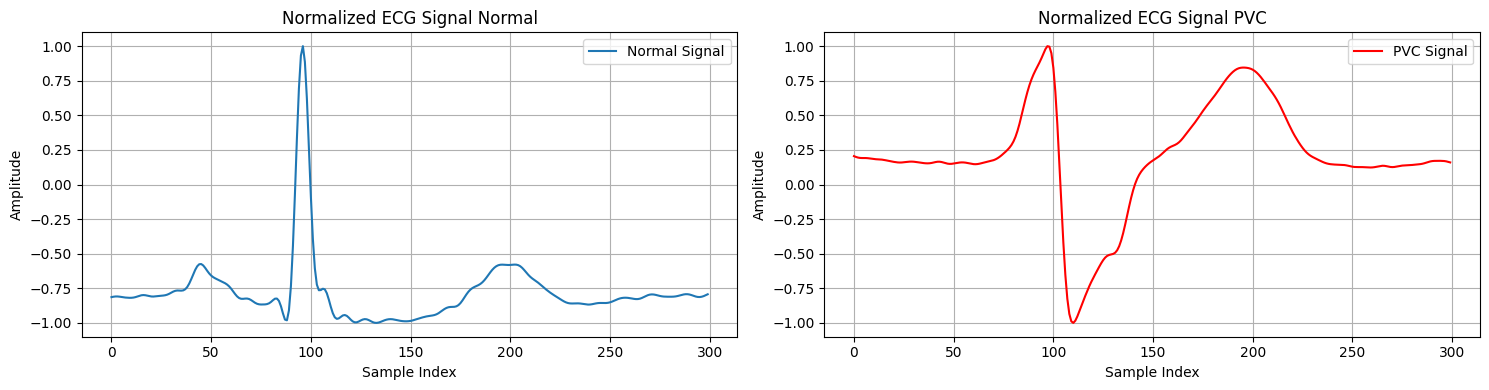

In [348]:
normal_signal = normalized_data[0]
pvc_signal=normalized_data[200]

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].plot(normal_signal, label="Normal Signal")
axs[0].set_title("Normalized ECG Signal Normal")
axs[0].set_xlabel("Sample Index")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(pvc_signal, label="PVC Signal", color='red')
axs[1].set_title("Normalized ECG Signal PVC")
axs[1].set_xlabel("Sample Index")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### **III) Feature Extraction Using Wavelet**

In [349]:
def extract_wavelet_features(signal, wavelet='db4', level=3):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    features = np.concatenate(coeffs)
    return features

In [350]:
features = np.array([extract_wavelet_features(sig) for sig in normalized_data])
normal_test = np.array([extract_wavelet_features(sig) for sig in normal_test])
pvc_test = np.array([extract_wavelet_features(sig) for sig in pvc_test])

# **6) Building Model**

### **I) Splitting Data**

In [351]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [352]:
arr=[]
for k in range (1,16,2):
    model2= KNeighborsClassifier(n_neighbors=k)
    model2=model2.fit(X_train,y_train)
    s=model2.score(X_test, y_test)
    arr.append(s)

In [353]:
fig = px.line(x=range(1,16,2), y=arr, line_shape='linear')
fig.layout.update(title='KNN Classifier Accuracy vs K', xaxis_title='K', yaxis_title='Accuracy')    
fig.update_traces(line=dict(color='green'))
fig.show()


### **II) Training Model**

In [354]:
knn = KNeighborsClassifier(n_neighbors=1)

In [355]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### **III) Evaluating Model**

In [356]:
y_pred = knn.predict(X_test)

In [357]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")

Accuracy: 100.0%


In [358]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



Text(70.72222222222221, 0.5, 'Actual')

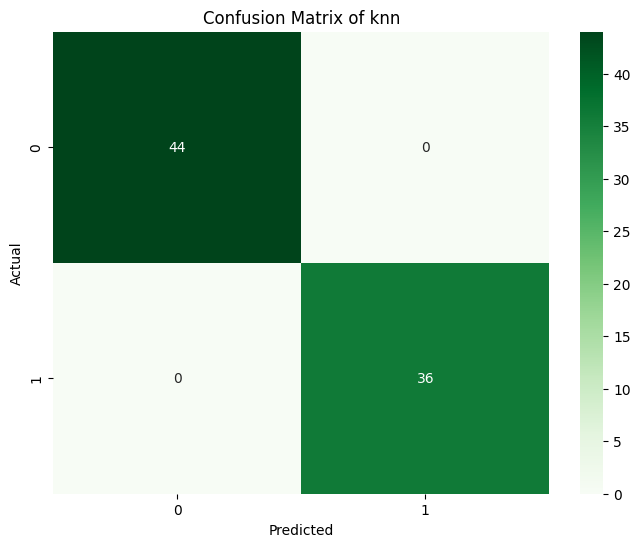

In [359]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d',cmap='Greens')
plt.title('Confusion Matrix of knn')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### **IV) Saving Model**

In [360]:
file='knn_model'
joblib.dump(knn,file)

['knn_model']

### **VI) Testing Model on Unseen Data**

In [361]:
normal_predictions=knn.predict(normal_test) #0
num_zeros = np.sum(normal_predictions== 0)
num_ones = np.sum(normal_predictions == 1)

print(f"Number of zeros: {num_zeros}")
print(f"Number of ones: {num_ones}")

Number of zeros: 200
Number of ones: 0


In [362]:
normal_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [363]:
pvc_predictions=knn.predict(pvc_test) #1

num_zeros = np.sum(pvc_predictions == 0)
num_ones = np.sum(pvc_predictions == 1)

print(f"Number of zeros: {num_zeros}")
print(f"Number of ones: {num_ones}")



Number of zeros: 0
Number of ones: 200


In [364]:
pvc_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

<span style="color: #ffffff">

---

#  *Prepared By **Team 1***

</span>